# Project: Investigate a Dataset  (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### The Dataset

This dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.<br>Different columns are for different characteristics about each patient:

 <ul>
    <li><b>PatientId: </b>Every patient has their unique id</li>
    <li><b>AppointmentID: </b>Every patient has appointment and it's unique id</li>
    <li><b>Gender: </b>Either Female or Male represented in columns as 'F' and 'M'</li>
    <li><b>ScheduledDay: </b>Tells us on what day the patient set up their appointment.</li>
    <li><b>AppointmentDay: </b>Every appointment and it's day of meeting</li>
    <li><b>Age: </b>Indicates patients age</li>
    <li><b>Neighbourhood: </b>Indicates the location of the hospital.</li>
    <li><b>Scholarship: </b>Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
    <li><b>Hipertension: </b>Indectes whether the patient has Hipertension or not</li>
    <li><b>Diabetes: </b>Indectes whether the patient has Diabetes or not</li>
    <li><b>Alcoholism: </b>Indectes whether the patient has Alcoholism or not</li>
    <li><b>Handcap: </b>Indectes whether the patient has Handicap or not</li>
    <li><b>SMS_received: </b>Indectes whether the patient has recived SMS message or not</li>
    <li><b>Showed_up: </b>Indectes whether the patient has showed up to their appointment or not</li>
    <li><b>Came: </b>Indectes only the patients that have showed up to their appointment</li>
    <li><b>Didnt_come: </b>Indectes only the patients that didn't showe up to their appointment</li>
    
</ul>

### About The Analysis

Using this Data set we should know What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### Questions To Be Explored

<ul>
    <li>What is the percentage of male and female patients?</li>
    <li>What is the percentage of patients who are enrolled in the scholarship program?</li>
    <li>What is the percentage of patients who are enrolled in the scholarship program came and didn't come?</li>
    <li>What is the mean age and the median age for patients who went to their appointments?</li>
    <li>What is the mean age and the median age for patients who didn't go to their appointments?</li>
    <li>What is the percentage of patients who came, and who didn't come to their appointments?</li>
    <li>What is the percentage of patients who received SMS, and who didn't receive SMS?</li>
    <li>Is receiving / not receiving SMS has an effect on showing up?</li>
    <li>What is the percentage of patients who received SMS, went, and who didn't go to their appointments?</li>
    <li>What is the percentage of patients who didn't receive SMS, went, and who didn't go to their appointments?</li>
    <li>What is the percentage of patients who have Alcoholism, and who didn't have it?</li>
    <li>What is the percentage of patients who have Diabetes, and who didn't have it?</li>
    <li>What is the percentage of patients who have Diabetes, and came and didn't come?</li>
    <li>What is the percentage of patients who have Hipertension, and who didn't have it?</li>
    <li>What is the percentage of patients who have Hipertension, and came and didn't come?</li>
    <li>Which neighborhood has the most patients that are showing up and not showing up?</li>
</ul>

In [1]:
# importing our packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<b> we lowered case the columns names so it will be easier to call them and deal with  them

In [3]:
df.columns = df.columns.str.lower()
df.head(6)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### We want to know how many rows and columns our Dataset has

In [5]:
df.shape

(110527, 14)

##### checking the data types

In [6]:
df.dtypes

patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no-show            object
dtype: object

#### finding the mean, midean, min and max values for each column

In [7]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### checking the NAN values in our data

In [8]:
df.isnull().any()

patientid         False
appointmentid     False
gender            False
scheduledday      False
appointmentday    False
age               False
neighbourhood     False
scholarship       False
hipertension      False
diabetes          False
alcoholism        False
handcap           False
sms_received      False
no-show           False
dtype: bool

##### we don't have NAN values

<b> checking the duplicates values

In [9]:
df.duplicated().all()

False

In [10]:
df.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no-show                2
dtype: int64

##### cheking if every pateint has more than one appointment or just one

In [11]:
df.patientid

0         2.987250e+13
1         5.589978e+14
2         4.262962e+12
3         8.679512e+11
4         8.841186e+12
              ...     
110522    2.572134e+12
110523    3.596266e+12
110524    1.557663e+13
110525    9.213493e+13
110526    3.775115e+14
Name: patientid, Length: 110527, dtype: float64

In [12]:
df.appointmentid

0         5642903
1         5642503
2         5642549
3         5642828
4         5642494
           ...   
110522    5651768
110523    5650093
110524    5630692
110525    5630323
110526    5629448
Name: appointmentid, Length: 110527, dtype: int64

In [13]:
df[['patientid' ,'appointmentid']]

,patientid,appointmentid
0,2.987250e+13,5642903
1,5.589978e+14,5642503
2,4.262962e+12,5642549
3,8.679512e+11,5642828
4,8.841186e+12,5642494
...,...,...
110522,2.572134e+12,5651768
110523,3.596266e+12,5650093
110524,1.557663e+13,5630692
110525,9.213493e+13,5630323


##### apparently every pateint has only one appointment.

so that means the average age that comes to the hospital is 37,
 and the oldest is 115,
 and the youngest is -1 which is wrong and we will fix this later.

In [14]:
df.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [15]:
df.scholarship.describe()

count    110527.000000
mean          0.098266
std           0.297675
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: scholarship, dtype: float64

we need to know the percentage of people that has scholarship

In [16]:
df[df.scholarship == 1].shape

(10861, 14)

so we have 10861 patients that are enrolled in the scolarship program

In [17]:
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

apparently, more females goes to hospital, we also need to know the percentage, which we will do later visually.


exploring appointmentday column

In [18]:
df['appointmentday'].head(30)

0     2016-04-29T00:00:00Z
1     2016-04-29T00:00:00Z
2     2016-04-29T00:00:00Z
3     2016-04-29T00:00:00Z
4     2016-04-29T00:00:00Z
5     2016-04-29T00:00:00Z
6     2016-04-29T00:00:00Z
7     2016-04-29T00:00:00Z
8     2016-04-29T00:00:00Z
9     2016-04-29T00:00:00Z
10    2016-04-29T00:00:00Z
11    2016-04-29T00:00:00Z
12    2016-04-29T00:00:00Z
13    2016-04-29T00:00:00Z
14    2016-04-29T00:00:00Z
15    2016-04-29T00:00:00Z
16    2016-04-29T00:00:00Z
17    2016-04-29T00:00:00Z
18    2016-04-29T00:00:00Z
19    2016-04-29T00:00:00Z
20    2016-04-29T00:00:00Z
21    2016-04-29T00:00:00Z
22    2016-04-29T00:00:00Z
23    2016-04-29T00:00:00Z
24    2016-04-29T00:00:00Z
25    2016-04-29T00:00:00Z
26    2016-04-29T00:00:00Z
27    2016-04-29T00:00:00Z
28    2016-04-29T00:00:00Z
29    2016-04-29T00:00:00Z
Name: appointmentday, dtype: object

In [19]:
df['appointmentday'].tail(30)

110497    2016-06-01T00:00:00Z
110498    2016-06-08T00:00:00Z
110499    2016-06-01T00:00:00Z
110500    2016-06-08T00:00:00Z
110501    2016-06-01T00:00:00Z
110502    2016-06-08T00:00:00Z
110503    2016-06-01T00:00:00Z
110504    2016-06-08T00:00:00Z
110505    2016-06-01T00:00:00Z
110506    2016-06-01T00:00:00Z
110507    2016-06-08T00:00:00Z
110508    2016-06-01T00:00:00Z
110509    2016-06-08T00:00:00Z
110510    2016-06-01T00:00:00Z
110511    2016-06-08T00:00:00Z
110512    2016-06-08T00:00:00Z
110513    2016-06-08T00:00:00Z
110514    2016-06-08T00:00:00Z
110515    2016-06-08T00:00:00Z
110516    2016-06-08T00:00:00Z
110517    2016-06-07T00:00:00Z
110518    2016-06-07T00:00:00Z
110519    2016-06-07T00:00:00Z
110520    2016-06-07T00:00:00Z
110521    2016-06-07T00:00:00Z
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: appointmentday, dtype: object

Thats the frist appointment and the last appointment according to the spreedsheet

In [20]:
df['appointmentday'].min(), df['appointmentday'].max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')


### Data Cleaning

###### After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.


so we should convert data types of scheduledday column to datetime datatype

In [21]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

and we will do the same to appointmentday and convert  its data types (string) to datetime datatype


In [22]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

checking the data types

In [23]:
df.dtypes

patientid                     float64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no-show                        object
dtype: object

now we should fix the problem of the age which is (-1)

checking all the ages that are less than 0

In [24]:
df[df.age < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


we will use the average value of age column to assign it to (-1)

In [25]:
df.age.mean()

37.08887421173107

so we can prevent the changing in dtypes we will take the int number and ignore the float

In [26]:
df.loc[99832, 'age'] = 37

In [27]:
df.loc[99832, 'age']

37

In [28]:
df[df.age < 0]


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show


so that means we fixed the -1 problem

In [29]:
df.columns = df.columns.str.replace('-', '_')

changing (no_show) to (showed_up) so we won't get confused while dealing with column later

In [30]:
df.rename(columns={'no_show': 'showed_up'}, inplace=True)

In [31]:
df['showed_up'].value_counts()

No     88208
Yes    22319
Name: showed_up, dtype: int64

now we should replace the values of 'Yes' and 'No' so our data will be the same and nothing is changed

In [32]:
df['showed_up'] = df['showed_up'].replace(['No','Yes'],['Yes','No'])

checking if we replaced them right

In [33]:
df['showed_up'].value_counts()

Yes    88208
No     22319
Name: showed_up, dtype: int64

changing the values of 'Yes' and 'No'  to  '1' and '0' so we will be able to compare it visually with other columns later on.

In [34]:
df['showed_up'][df['showed_up'] == 'Yes'] = '1'

/tmp/ipykernel_22549/4119907562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['showed_up'][df['showed_up'] == 'Yes'] = '1'


In [35]:
df[df.showed_up == '1']

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [36]:
df.showed_up[df.showed_up == 'No'] = '0'

/tmp/ipykernel_22549/2227894281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.showed_up[df.showed_up == 'No'] = '0'


In [37]:
df[df.showed_up == '0']

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,0
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,0
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,0
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45,BARRO VERMELHO,0,0,0,0,0,0,0
110492,6.456342e+14,5786741,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,0
110496,8.544295e+13,5779046,F,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,1,0,0,0,0,0
110515,6.456342e+14,5778621,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,0


assign the patients that have and haven't come to the hospital to a variable,
 so we will us it to create new column and even use it in our analysis

In [38]:
came = df.showed_up == '1'

In [39]:
didnt_come = df.showed_up == '0'

creating new column, would be better and easier for us to compare between different columns at the same time, and it will carry the value that indicates that patients have came to their appointment

In [40]:
df['came'] = came

checking the created column

In [41]:
df[df['came']]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,came
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,True
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,True
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,True
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,True
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1,True
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1,True
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1,True
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1,True


creating new column, would be better and easier for us to compare between different columns at the same time, and it will carry the value that indicates that patients have NOT came to their appointment

In [42]:
df['didnt_come'] = didnt_come

checking the created column

In [43]:
df[df['didnt_come']]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,came,didnt_come
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,0,False,True
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,0,False,True
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,0,False,True
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,0,False,True
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45,BARRO VERMELHO,0,0,0,0,0,0,0,False,True
110492,6.456342e+14,5786741,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,0,False,True
110496,8.544295e+13,5779046,F,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,1,0,0,0,0,0,False,True
110515,6.456342e+14,5778621,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,0,False,True


changing the data types from bool to int, so it will be 1 and 0, since most of the other columns is int so it is important to change the data type of columns like came and didn't come, so it will be easier to compare<br>
both ways it will work, but it's preferable when you read the data

In [44]:
df['came'] = df['came'].astype(int)

In [45]:
df['didnt_come'] = df['didnt_come'].astype(int)

assign the patients that have and have not received sms from the hospital to a variable,
 so we will us it to create new column and even use it in our analysis,<br>
 and compare it with columns like 'came' and 'didnt_come'<br>
 which we will cover more in depth later on.

In [46]:
received = df['sms_received'] == 1

In [47]:
df['received']=received

<b>checking that we made the column

In [48]:
df[df['received']]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,came,didnt_come,received
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,0,0,1,True
15,9.994839e+10,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,1,1,0,True
18,1.713538e+13,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,1,1,0,True
22,8.632298e+14,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,0,0,1,True
25,5.819370e+12,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,1,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1,1,0,True
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1,1,0,True
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1,1,0,True
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1,1,0,True


changing the data types from bool to int 

In [49]:
df['received'] = df['received'].astype(int)

In [50]:
didnt_receive = df['sms_received'] == 0

In [51]:
df['didnt_receive'] = didnt_receive

<b>checking that we made the column

In [52]:
df[df['didnt_receive']]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,came,didnt_come,received,didnt_receive
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,1,0,0,True
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,1,0,0,True
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,1,0,0,True
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,1,0,0,True
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,1,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110513,8.674778e+13,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,1,1,0,0,True
110514,2.695685e+12,5786567,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,1,1,0,0,True
110515,6.456342e+14,5778621,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,0,0,1,0,True
110516,6.923772e+13,5780205,F,2016-06-07 07:45:16+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,0,0,0,0,0,0,0,1,0,True


changing the data types from bool to int<br>
both ways it will work, but it's preferable when you read and compare the data

In [53]:
df['didnt_receive'] = df['didnt_receive'].astype(int)

we needed to changed the data type of 'showed_up' from string to int so we can compare it easliy later on with other columns if we needed to.

In [54]:
df['showed_up'] = df['showed_up'].astype(int)

we want to know how many patients that has scholarship came<br>
and we want to know how many patients that has scholarship didn't come<br>
and we will apply this later on visually.

In [55]:
df[came]['scholarship'].value_counts()

0    79925
1     8283
Name: scholarship, dtype: int64

In [56]:
df[didnt_come]['scholarship'].value_counts()

0    19741
1     2578
Name: scholarship, dtype: int64

<b>The final check for our data types before the visualization

In [57]:
df.dtypes

patientid                     float64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
showed_up                       int64
came                            int64
didnt_come                      int64
received                        int64
didnt_receive                   int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Comparison between the number males and females patients in the hospital)

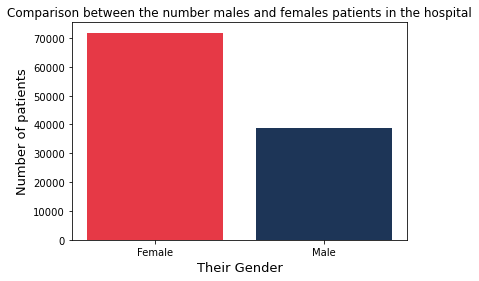

In [58]:
heights = df['gender'].value_counts()
locations = [1, 2]
labels = ['Female', 'Male']
plt.bar(locations, heights, tick_label=labels, color = ['#e63946' , '#1d3557'])
plt.title('Comparison between the number males and females patients in the hospital' , fontsize = 12)
plt.xlabel('Their Gender', fontsize = 13)
plt.ylabel('Number of patients', fontsize = 13)
plt.show();

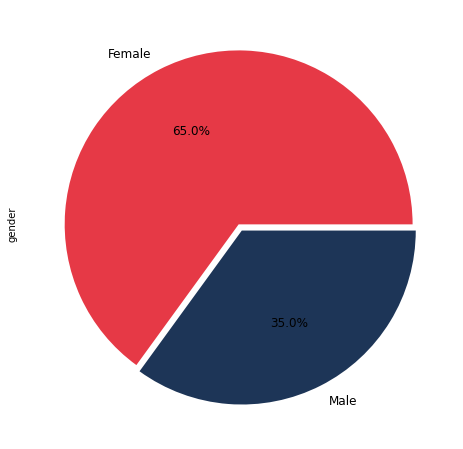

In [59]:
labels = ['Female', 'Male']
colors = ['#e63946','#1d3557']
df['gender'].value_counts().plot.pie(subplots=True, figsize=(8, 8),labels = labels, colors = colors, autopct='%1.1f%%', fontsize = 12, explode=(0, .04))
plt.show()

so there is more female patients going to the hospital <br>
females are almost twice males

### Research Question 2 (Comparison between how many patients have scholrship)
<b> 1 indicates to how many people are enrolled 

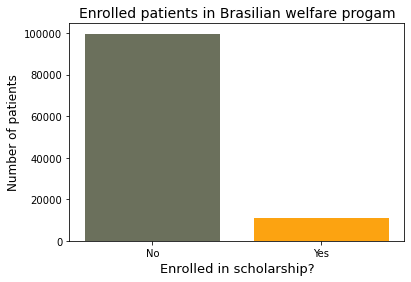

In [60]:
heights = df['scholarship'].value_counts()
locations = [1, 2]
labels = ['No', 'Yes']
plt.bar(locations, heights, tick_label=labels, color = [ '#6b705c','#fca311'])
plt.title('Enrolled patients in Brasilian welfare progam' , fontsize = 14)
plt.xlabel('Enrolled in scholarship?', fontsize = 13)
plt.ylabel('Number of patients', fontsize = 12)
plt.show();

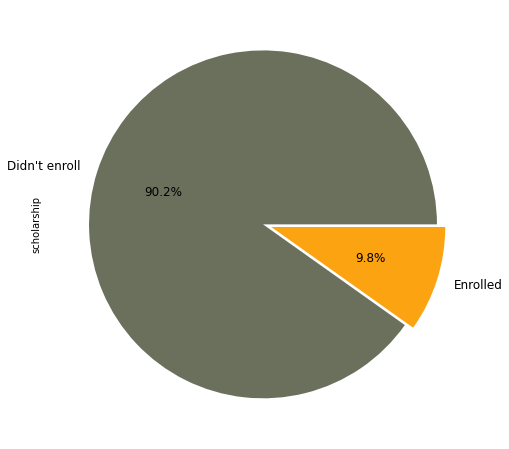

In [61]:
colors = ['#6b705c', '#fca311']
labels = ["Didn't enroll", 'Enrolled']
df['scholarship'].value_counts().plot.pie(subplots=True,labels = labels ,figsize = (8,8) ,colors=colors, autopct='%1.1f%%', fontsize = 12, explode=(0, .05))
plt.show()

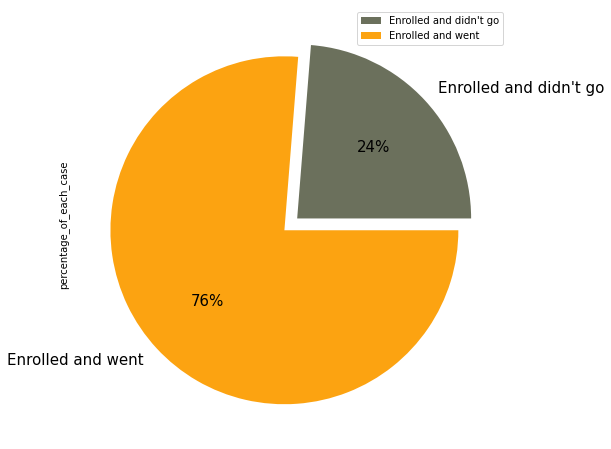

In [62]:
schCompare = pd.DataFrame({'schCompare': ['Enrolled and went', "Enrolled and didn't go"],
                          'percentage_of_each_case': [8283 ,2578]})
  

schCompare.groupby(['schCompare']).sum().plot(
    kind='pie', y='percentage_of_each_case', autopct='%1.0f%%', figsize = (8,8), fontsize = 15, colors = [ '#6b705c' ,'#fca311'], explode = (0.05,0.05))
plt.show()

so according to our analysis that the frequence of patients who went and they are enrolled to <b>brasilian welfare program </b> are 76% <br>
and the frequence of patients who didn't go and they are enrolled to <b>brasilian welfare program </b> are 24% <br>
as it's shown in our analysis that less than 10% of 110k patients is only enrolled is scholarship program

### Research Question 3 (Show patients age and compare them between showing up and not showing up)

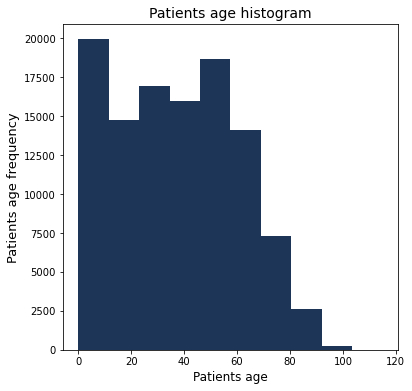

Mean age: 37.79049519317976


In [63]:
df.age.plot.hist(figsize = (6,6), color = '#1d3557')
plt.title("Patients age histogram" ,fontsize = 14)
plt.xlabel("Patients age" ,fontsize = 12)
plt.ylabel("Patients age frequency" ,fontsize = 13)

plt.show()
print('Mean age: {}'.format(df[came]['age'].mean()))

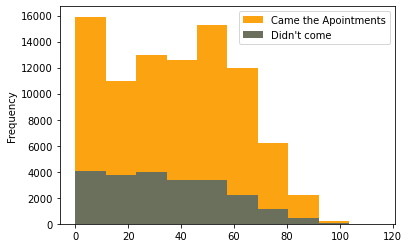

The meidan age of the patients that went to the Appointments:38.00
The mean age of the patients that went to the Appointments:37.79

The median age of the patients that didn't go to the Appointments:33.00
The mean age of the patients that didn't go to the Appointments:34.32


In [64]:
df[came].age.plot.hist(color = '#fca311')
df[didnt_come].age.plot.hist(color = '#6b705c')
plt.legend(['Came the Apointments', "Didn't come"])
plt.show()
print('The meidan age of the patients that went to the Appointments:{:.2f}'.format(df[came].age.median()))
print('The mean age of the patients that went to the Appointments:{:.2f}\n'.format(df[came].age.mean()))

print("The median age of the patients that didn't go to the Appointments:{:.2f}".format(df[didnt_come].age.median()))
print("The mean age of the patients that didn't go to the Appointments:{:.2f}".format(df[didnt_come].age.mean()))

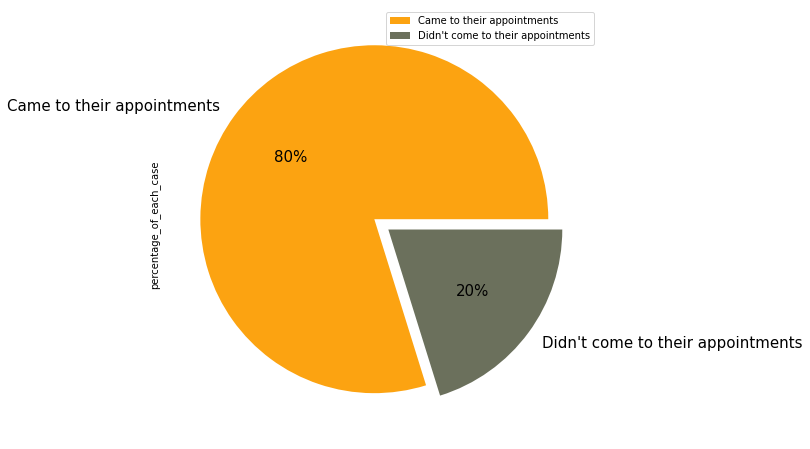

In [65]:
showCompare= pd.DataFrame({'showCompare': ['Came to their appointments', "Didn't come to their appointments"],
                          'percentage_of_each_case': [ df[received]['came'].sum() + df[didnt_receive]['came'].sum() , df[received]['didnt_come'].sum() + df[didnt_receive]['didnt_come'].sum()]})
  

showCompare.groupby(['showCompare']).sum().plot(
    kind='pie', y='percentage_of_each_case', autopct='%1.0f%%', figsize = (8,8), fontsize = 15, colors = [  '#fca311','#6b705c'], 
    explode = (0.05,0.05))
plt.show()

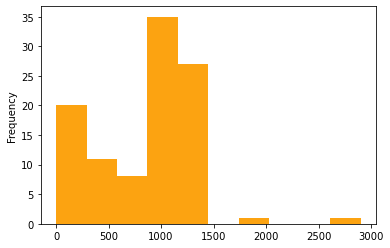

The total number of patients that went: 88208


In [66]:
df[came]['age'].value_counts().plot(kind = 'hist',color = '#fca311');
plt.show()
print('The total number of patients that went: {}'.format(df['came'].sum()))

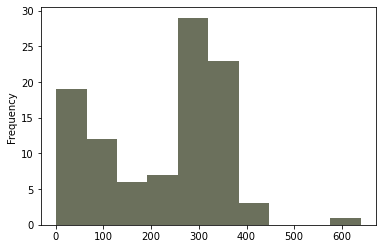

The total number of patients that didnt go: 22319


In [67]:
df[didnt_come]['age'].value_counts().plot(kind = 'hist', color = '#6b705c');
plt.show()
print('The total number of patients that didnt go: {}'.format(df['didnt_come'].sum()))

so as we can see that the older patients are more stick to their appointmetns <br>
the average age of patients who went to their appointments is 37 <br>
the median age of patients who went to their appointments is 38 <br>
the average age of patients who didn't go to their appointments is 33 <br>
the median age of patients who went to their appointments is 34 <br>

and it's 20% of patients that didn't go to their appointments

### Research Question 4 (Comparison between how many patients showed up and not)

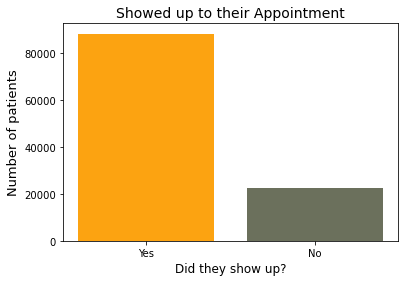

In [68]:
heights = df['showed_up'].value_counts()
locations = [1, 2]
labels = ['Yes', 'No']
plt.bar(locations, heights, tick_label=labels, color = [ '#fca311', '#6b705c'])
plt.title('Showed up to their Appointment' , fontsize = 14)
plt.xlabel('Did they show up?', fontsize = 12)
plt.ylabel('Number of patients', fontsize = 13)
plt.show();

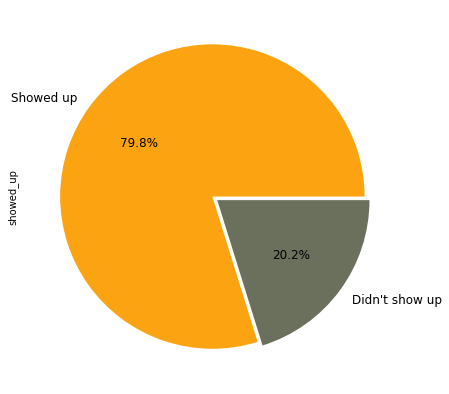

In [69]:
labels = ["Showed up", "Didn't show up"]
colors = ['#fca311', '#6b705c']
df['showed_up'].value_counts().plot(kind = 'pie',labels = labels , figsize = (7,7), colors = colors, autopct='%1.1f%%', fontsize = 12, explode=(0, .04));

### Research Question 5 (Comparison between how many patients received sms and how many did not)

#### so apperantly the age has nothing to do with going to the appointments

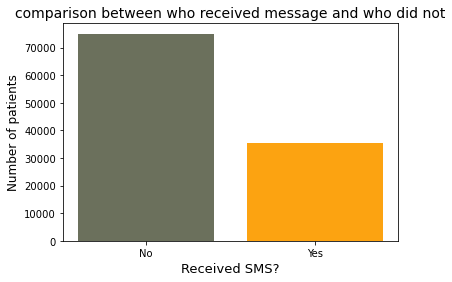

In [70]:
heights = df['sms_received'].value_counts()
locations = [1, 2]
labels = ['No', 'Yes']
plt.bar(locations, heights, tick_label=labels, color = [ '#6b705c','#fca311'])
plt.title('comparison between who received message and who did not' , fontsize = 14)
plt.xlabel('Received SMS?', fontsize = 13)
plt.ylabel('Number of patients', fontsize = 12)
plt.show();

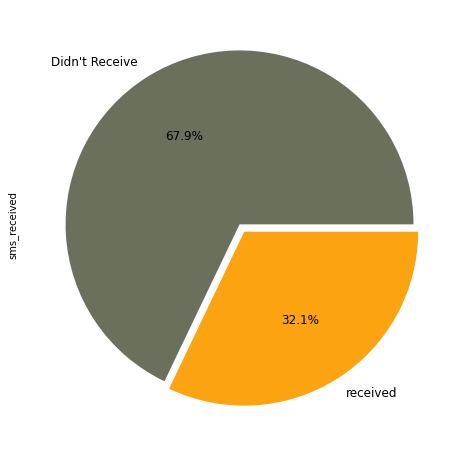

In [71]:
df['sms_received'].value_counts().plot(kind = 'pie',figsize = (8,8), autopct='%1.1f%%', fontsize = 12, explode=(0, .05), labels = ["Didn't Receive","received"], colors = ['#6b705c','#fca311']);

there is lack in sending SMS messages to patients which might affect their attendance <br>
we will see that in depth so we can find the asnwer to our question 

### Research Question 6 (is receiving / not receiving sms has an effect on showing up?)

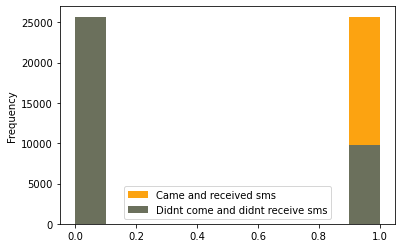

The total patients that received sms and came: 25698
The total patients that received sms and didnt come:: 9784

The total pbatients that didnt received sms and didnt come:: 12535
The total patients that didnt received sms and came: 62510



In [72]:
df[received].came.plot.hist(color = '#fca311')
df[received].didnt_come.plot.hist(color = '#6b705c') 
plt.legend(['Came and received sms', 'Didnt come and didnt receive sms' ])
plt.show()
print('The total patients that received sms and came: {}'.format(df[received]['came'].sum()))
print('The total patients that received sms and didnt come:: {}\n'.format(df[received]['didnt_come'].sum()))
print('The total pbatients that didnt received sms and didnt come:: {}'.format(df[didnt_receive]['didnt_come'].sum()))
print('The total patients that didnt received sms and came: {}\n'.format(df[didnt_receive]['came'].sum()))


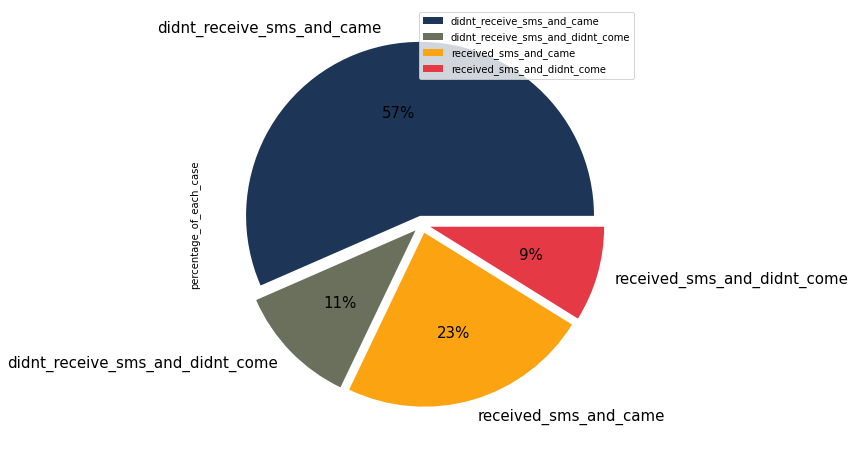

In [73]:
smsCompare = pd.DataFrame({'smsCompare': ['received_sms_and_came', 'received_sms_and_didnt_come', 'didnt_receive_sms_and_didnt_come', 
                                   'didnt_receive_sms_and_came'],
                          'percentage_of_each_case': [df[received]['came'].sum(),df[received]['didnt_come'].sum(), df[didnt_receive]['didnt_come'].sum(), df[didnt_receive]['came'].sum()]})
  

smsCompare.groupby(['smsCompare']).sum().plot(
    kind='pie', y='percentage_of_each_case', autopct='%1.0f%%', figsize = (8,8), fontsize = 15, colors = ['#1d3557', '#6b705c', '#fca311', '#e63946'], explode = (0.05,0.05,0.05,0.05))
plt.show()

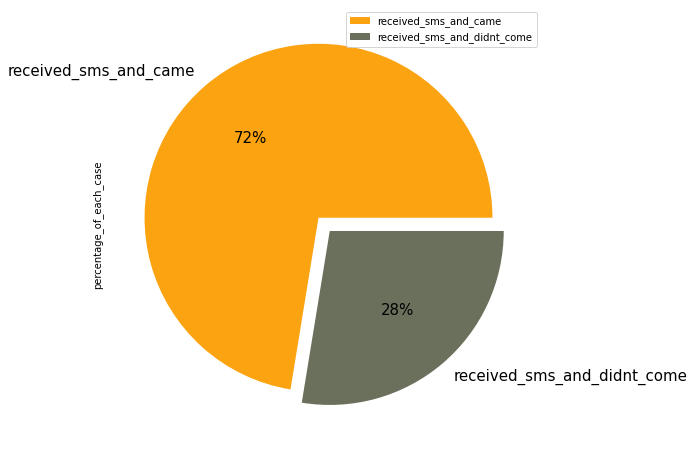

In [74]:
smsCompare_1= pd.DataFrame({'smsCompare_1': ['received_sms_and_came', 'received_sms_and_didnt_come'],
                          'percentage_of_each_case': [df[received]['came'].sum(),df[received]['didnt_come'].sum()]})
  

smsCompare_1.groupby(['smsCompare_1']).sum().plot(
    kind='pie', y='percentage_of_each_case', autopct='%1.0f%%', figsize = (8,8), fontsize = 15, colors = ['#fca311', '#6b705c'], 
    explode = (0.05,0.05))
plt.show()

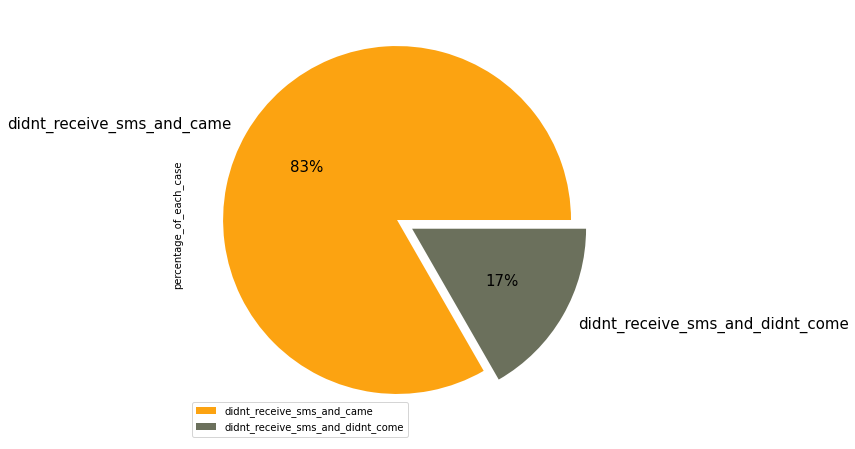

In [75]:
smsCompare_2= pd.DataFrame({'smsCompare_2': ['didnt_receive_sms_and_didnt_come', 'didnt_receive_sms_and_came'],
                          'percentage_of_each_case': [ df[didnt_receive]['didnt_come'].sum(), df[didnt_receive]['came'].sum()]})
  

smsCompare_2.groupby(['smsCompare_2']).sum().plot(
    kind='pie', y='percentage_of_each_case', autopct='%1.0f%%', figsize = (8,8), fontsize = 15, colors = ['#fca311', '#6b705c'], 
    explode = (0.05,0.05))
plt.show()

patients that didn't come with sms<br>
patients who received SMS message and came 23%<br>
patients who received SMS message and didn't come 9%<br>
patients who didn't receive SMS message and came 57%<br>
patients who didn't receive SMS message and didn't come 11%<br>

Suprisingly, the percentage of patients that came without sms is more than the percentage of patients that came with sms,<br>
and top of that the absence percentage of patients that didn't come without sms is less than the percentage of 

and the total of received SMS messages is 32% <br>
and the total of Not received SMS messages is 68%

### Research Question 7 (Comparison between how many patients is alcholoism and how many is not)

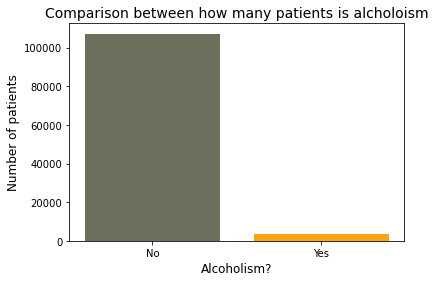

In [76]:
heights = df['alcoholism'].value_counts()
locations = [1, 2]
labels = ['No', 'Yes']
plt.bar(locations, heights, tick_label=labels, color = [ '#6b705c','#fca311'])
plt.title('Comparison between how many patients is alcholoism', fontsize = 14)
plt.ylabel('Number of patients', fontsize = 12)
plt.xlabel('Alcoholism?', fontsize = 12)
plt.show();

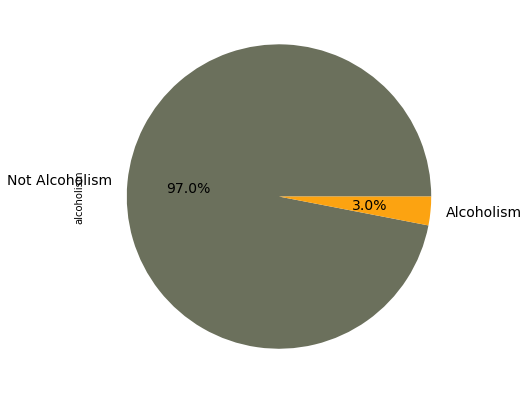

In [77]:
df['alcoholism'].value_counts().plot(kind = 'pie' , figsize = (7,7), autopct='%1.1f%%', fontsize = 14, labels = ["Not Alcoholism", "Alcoholism"], colors = [ '#6b705c','#fca311'])
plt.show()

### Research Question 8 (Comparison between how many patients is diabetes and how many is not)

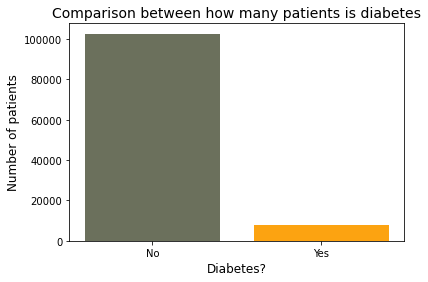

In [78]:
heights = df['diabetes'].value_counts()
locations = [1, 2]
labels = ['No', 'Yes']
plt.bar(locations, heights, tick_label=labels, color = [ '#6b705c','#fca311'])
plt.title('Comparison between how many patients is diabetes', fontsize = 14)
plt.ylabel('Number of patients',  fontsize = 12)
plt.xlabel('Diabetes?', fontsize = 12)
plt.show();

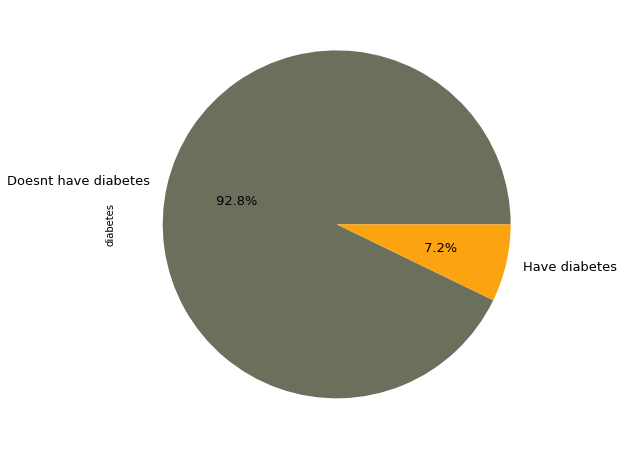

In [79]:
df['diabetes'].value_counts().plot(kind = 'pie' , figsize = (8,8), autopct =' %1.1f%%',
                                   labels = ['Doesnt have diabetes','Have diabetes'] , fontsize = 13
                                  , colors = [ '#6b705c','#fca311'])
plt.show()

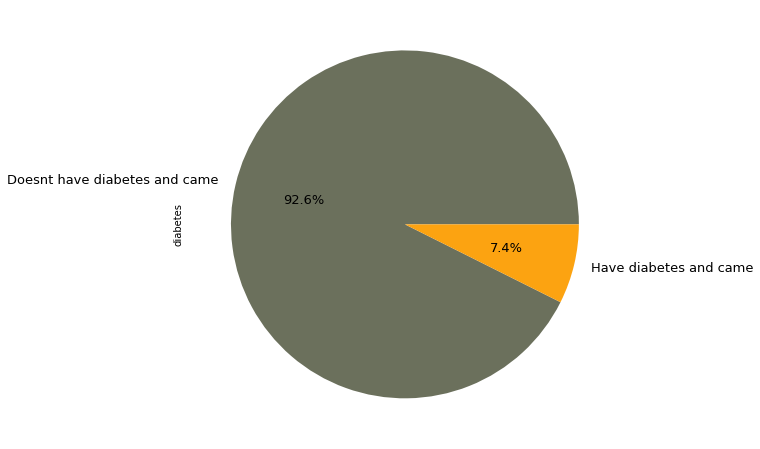

In [80]:
df[came]['diabetes'].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%',
                                   labels = ['Doesnt have diabetes and came','Have diabetes and came'] , fontsize = 13
                                  , colors = [ '#6b705c','#fca311'], figsize = (8,8))
plt.show()

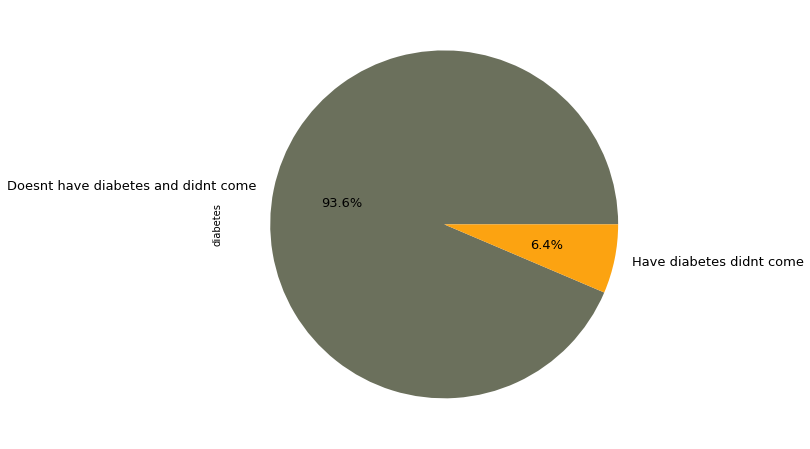

In [81]:
df[didnt_come]['diabetes'].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%',
                                   labels = ['Doesnt have diabetes and didnt come','Have diabetes didnt come'] , fontsize = 13
                                  , colors = [ '#6b705c','#fca311'], figsize = (8,8))
plt.show()

the entire proportion of patients that have diabetes is 7.2% <br>
and the proportion of patients that have diabetes and showed up to their appointments is 7.4% <br>
and the proportion of patients that have diabetes and didn't go to their appointments is 6.4% <br>

### Research Question 9 (Comparison between how many patients is hipertension and how many is not)

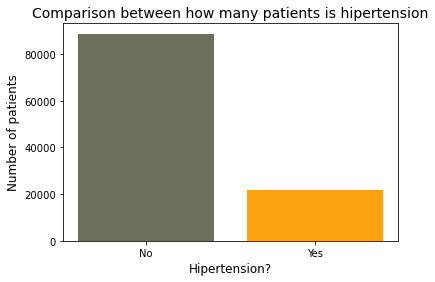

In [82]:
heights = df['hipertension'].value_counts()
locations = [1, 2]
labels = ['No', 'Yes']
plt.bar(locations, heights, tick_label=labels, color = [ '#6b705c','#fca311'])
plt.title('Comparison between how many patients is hipertension', fontsize = 14)
plt.ylabel('Number of patients',  fontsize = 12)
plt.xlabel('Hipertension?', fontsize = 12)
plt.show();

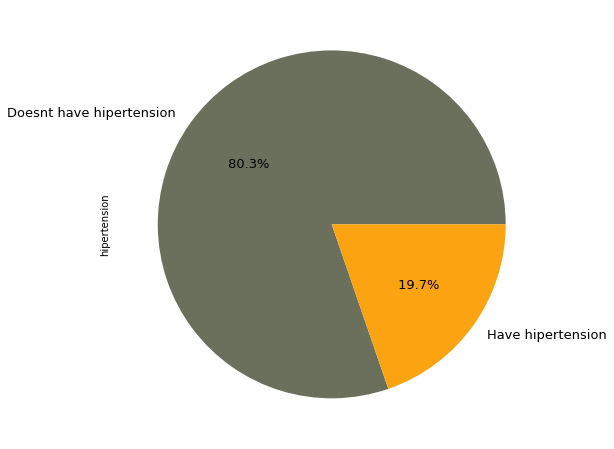

In [83]:
df['hipertension'].value_counts().plot(kind = 'pie' , figsize = (8,8), autopct =' %1.1f%%',
                                       labels = ['Doesnt have hipertension','Have hipertension'] , fontsize = 13
                                      , colors = [ '#6b705c','#fca311'])
plt.show()

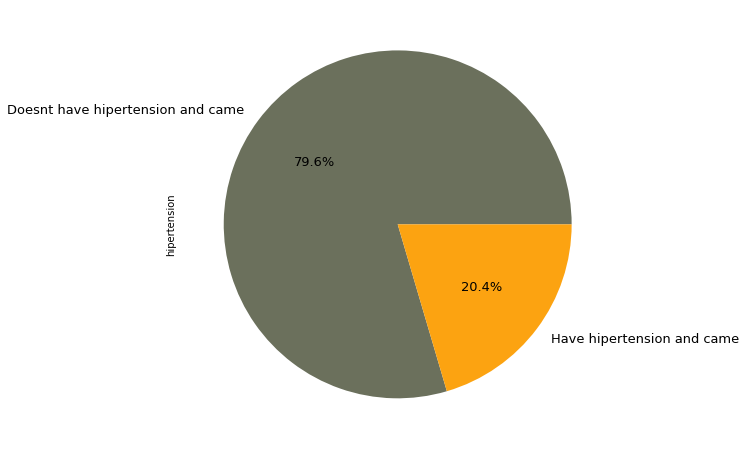

In [84]:
df[came]['hipertension'].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%',
                                   labels = ['Doesnt have hipertension and came','Have hipertension and came'] , fontsize = 13
                                  , colors = [ '#6b705c','#fca311'], figsize = (8,8))
plt.show()

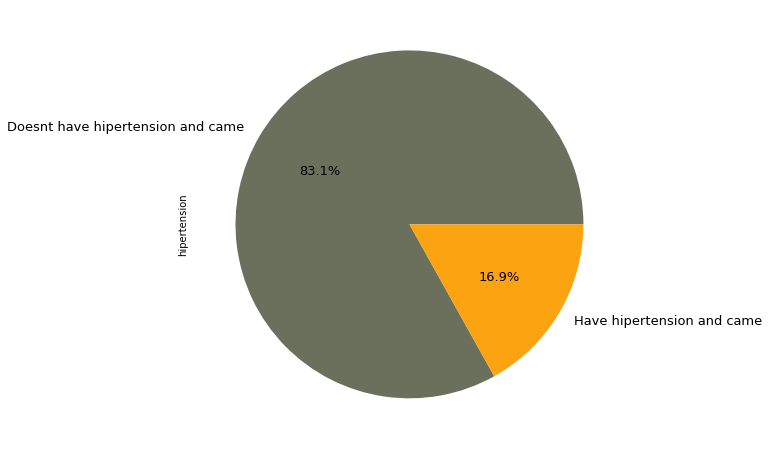

In [85]:
df[didnt_come]['hipertension'].value_counts().plot(kind = 'pie' , autopct = '%1.1f%%',
                                   labels = ['Doesnt have hipertension and came','Have hipertension and came'] , fontsize = 13
                                  , colors = [ '#6b705c','#fca311'], figsize = (8,8))
plt.show()

the entire proportion of patients that have hipertension is 19.7% <br>
and the proportion of patients that have hipertension and showed up to their appointments is 20.4% <br>
and the proportion of patients that have hipertension and didn't go to their appointments is 16.9% <br>

### Research Question 9 (Show patients locations and compare their locations to their showig up or not and finding the relation)

In [86]:
df[came]['neighbourhood'].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighbourhood, Length: 80, dtype: int64

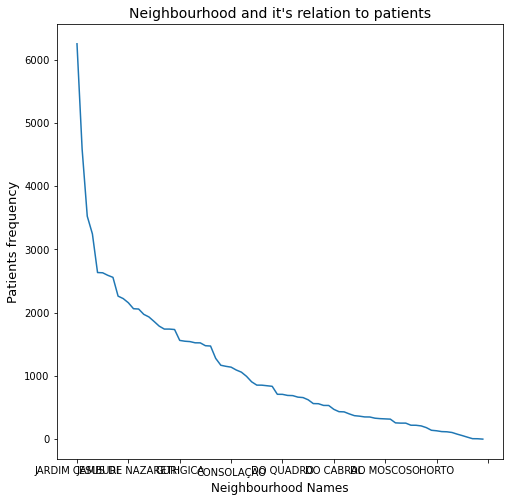

In [87]:
df[came]['neighbourhood'].value_counts().plot(kind = 'line', figsize = (8,8))
plt.title("Neighbourhood and it's relation to patients" ,fontsize = 14)
plt.xlabel("Neighbourhood Names" ,fontsize = 12)
plt.ylabel("Patients frequency" ,fontsize = 13)

plt.show()

In [88]:
df[didnt_come]['neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: neighbourhood, Length: 80, dtype: int64

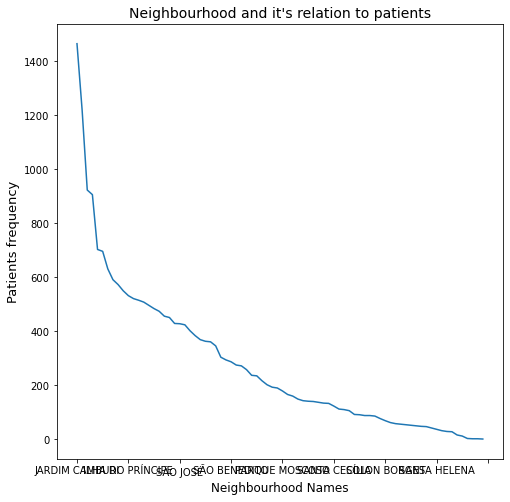

In [89]:
df[didnt_come]['neighbourhood'].value_counts().plot(kind = 'line', figsize = (8,8))
plt.title("Neighbourhood and it's relation to patients" ,fontsize = 14)
plt.xlabel("Neighbourhood Names" ,fontsize = 12)
plt.ylabel("Patients frequency" ,fontsize = 13)

plt.show()

so apparently we have more patients (that goes to the hospital) in those locations {Jardim Camburi, Maria Ortiz, Resistencia, Jardim Da Penha, Santa Martha} <br>
and apparently we have less patients (that doesn't go to the hospital) in those locations {Jardim Camburi, Maria Ortiz, Resistencia, Itarare, Centro} <br>

<a id='conclusions'></a>
## Conclusions

> so my conclusions about the whole dataset is:
<ul>
<li>Most of the patients were females</li><br>
<li>Only less than 10% has the scholarship</li><br>
<li>Most of the patients are babies</li><br>
    <li>Most of the patients showed up to their appointment</li><br>
    <li>68% of the patients didnt receive SMS</li><br>
    <li>SMS messages didnt play huge rule in the matter of coming to the appointments</li><br>
    <li>Most of the patients are not alcoholism diagnosis only 3.0% are</li><br>
    <li>Most of the patients are not diabetes diagnosis only 7.2% are</li><br>
    <li>Most of the patients are not hipertension diagnosis only 19.7% are</li><br>
    <li>Most of the patients who are enrolled in scholarship tend to came to their appointments 76%</li><br>    
</ul>



> <b>some advices i would love to adress as a data analyst:</b>
<ul>
    <li>I would recommend not to send SMS messages because it is proven by our analysis that 68% of the total patients didn't receive SMS, however 83% of them came and just 17%, which makes the number of patients that comes without SMS more than the number of patients that comes with the SMS,<br>
    so i would recommend not to send SMS messages bc it will save time and money</li><br>
    <li>To focus on marketing in those specific locations<br>
     {Jardim Camburi, Maria Ortiz, Resistencia, Jardim Da Penha, Santa Martha}<br>
    so we will increase the chances for making new clients and also showing up more to the appointments</li><br>
    <li>And also we should provied more services on those specific. areas<br>
    {Jardim Camburi, Maria Ortiz, Resistencia, Itarare, Centro}<br>
    so we will increase the chances for making new clients and also showing up more to the appointments</li><br>
    <li>also i noticed the patients that you have most of them is females so you can provide some special services, for sure it will make the hospital special itself and comfortable for patients.
    </li><br>   
</ul>


### Limitations
<ul><li>
 The data covers short period of time it would have been better if it was more than that<br>
    </li>
    <li>
Also lack of infromations and i had to fix the (-1) age problem<br>
        </li>
    <li>
 Only 32% SMS messages were recieved, and 72% of the people who recieved the SMS were able to come, however 28% couldn't come and they couldn't reschedule their appointment with the hosoital <br>
        </li>
</ul>